#### If we get an error due to certificate, run this code as code (instructor)
import sys, os

def override_where():
    """ overrides certifi.core.where to return actual location of cacert.pem"""
    # change this to match the location of cacert.pem
    return os.path.abspath("cacert.pem")


#is the program compiled?
if hasattr(sys, "frozen"):
    import certifi.core

    os.environ["REQUESTS_CA_BUNDLE"] = override_where()
    certifi.core.where = override_where

    # delay importing until after where() has been replaced
    import requests.utils
    import requests.adapters
    # replace these variables in case these modules were
    # imported before we replaced certifi.core.where
    requests.utils.DEFAULT_CA_BUNDLE_PATH = override_where()
    requests.adapters.DEFAULT_CA_BUNDLE_PATH = override_where()
    

<span style="font-family: Palatino; font-size: 40px; color:purple">
             Homework - estimate sales volume for a retail chain.
</span>


<span style="font-size:25px; color:purple">
    <b>Background</b>
</span>

### <span style="font-size:18px; color:purple">Business context</span>

**A large convenience store chain is interested in understanding when it can expect sales to be higher or lower than typical volumes.**

**To date, little has been done by the firm to analyze or document the degree to which holidays or particular days of the week may affect sales.**

**As a first step to understanding the problem, the company has reasoned that it would be useful understand on which days the firm may expect higher or lower sales volumes across its stores. (Later on, the firm plans to refine this analysis on a store-by-store basis).**

### <span style="font-size:18px; color:purple">Data</span>

The dataset `retail_sales.csv` contains a little over a million observations on the sales of 1115 stores for the period 2013-01-01 through 2015-09-17.  The abridged data dictionary for the file is given below:

| Column | Description|
| :--   ||
|`Store`         |   unique store identifier 
|`DayOfWeek`     |   day of week on which sales were observed (1= Sunday, 7 = Saturday)|
|`Date`          |   date on which sales were observed|
|`Open`          |   indicator of whether store was open on the day of the observation|
|`Promo`         |   indicator of whether store was running a promotion on the day of the observation|
|`StateHoliday`  |   indicator of whether date of observation was an official state holiday (a = public holiday, b = Easter, c = Christmas, 0 = No holiday)|
|`SchoolHoliday` |   indicator of whether date of observation was an official school holiday|
|`Sales`         |   total sales (in USD) for the store on the date of observation|
|`Customers`     |   total number of purchasing customers for the store the on the date of observation  (This cannot be observed prior to the sales, so it cannot be used as an independent variable.)|

### <span style="font-size:18px; color:purple">Mandate</span>

The finance division has suggested it first needs to estimate the degree to which the aggregate sales of a store might have the opportunity to have much higher or lower sales than is typical for its stores.  (The company realizes that there is censorship in that sales will be lower when inventory runs short, but this is meant only to be a first step.)  Because different stores have different school and state holidays, the finance department has suggested that each store's sales be predicted and then that these predictions be aggregated across stores on a weekly basis.

You have been asked to build **two** models:

1. A crude model to predict the *total sales* volume for the firm on a given day.  
2. A crude model to estimate the *probability* that a specific store will have much lower sales than the average sales for all stores  historically, where "much lower" is defined as more than one standard deviation below the historical average for all stores.   (Ignore for now issues of drift and of temporal and same-store correlation.)


### <span style="font-size:18px; color:purple">Requirements</span>

* Please use `statsmodels.api` for your analysis.  
* To keep things simple, please estimate "linear" models only.  Please start the walk-forward test on July 1, 2014, proceeding in one-week increments.
* Please assume that for any `Store` on any `Date`, you will always _know in advance_ (i.e., before the beginning of each day) the values of:
  * `DayOfWeek`
  * `Open`
  * `Promo`
  * `StateHoliday` and 
  * `SchoolHoliday` .

### <span style="font-size:18px; color:purple">Data set location</span>

In [6]:
path = "./retail_sales"
fn      = 'retail_sales.csv'
full_fn = path+'/'+fn

In [3]:
pwd

'C:\\Users\\wolfs\\roger2022\\Homeworks'

<span style="color:purple"> `<span style="color:purple"> ________________________________________________________________________ </span>`

## <span style="color:purple"> Q1: Please import the data and clean up the data frame to remove `NA` values, and convert any data types that imported incorrectly.  Then divide the data into  `traning` and `testing` samples. 
You will also need to convert some of the fields into more useful data types. Split on the following date: 2014-07-01</span>

In [7]:
import pandas as pd

df = pd.read_csv(XXX)
df.dropna(axis='index', subset=['Sales'],inplace=True)
#cast dataframe to date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#Convert StateHoliday column to string
df['StateHoliday'] = df['StateHoliday'].astype(XXX)
#Split training data
df_train = df.loc[df['Date'] < XXX]
df_test  = df.loc[df['Date'] >= XXX]

C:\Users\wolfs\miniconda3\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


 
## <span style="color:purple">  Q2: Please perform EDA on the *`training` set (only)* to get a sense of whether you need to perform transformations </span>

Use `dataprep` to examine each column.  Also examine the relationship between each variable and `Sales.`    Write down your impressions of each variable's characteristics, and how you would transform the data, if transformation is necessary, in the spaces below: 

In [1]:
!pip install dataprep

ERROR: Could not find a version that satisfies the requirement dataprep1111111 (from versions: none)
ERROR: No matching distribution found for dataprep1111111


In [17]:
#import dataprep and use it to do EDA, pay special attention to the "Open" columns
import XXX
XXX


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_13584/1671848267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['StateHoliday'] = pd.to_numeric(df_tmp['StateHoliday'], downcast='integer', errors='coerce')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
408420,1,1,2014-06-30,5738,641,1,1,0.0,0
408421,2,1,2014-06-30,10682,1021,1,1,0.0,0
408422,3,1,2014-06-30,15689,1193,1,1,0.0,0
408423,4,1,2014-06-30,15672,1783,1,1,0.0,0
408424,5,1,2014-06-30,7954,784,1,1,0.0,0
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,NaN,1
1016827,733,2,2013-01-01,10765,2377,1,0,NaN,1
1016863,769,2,2013-01-01,5035,1248,1,0,NaN,1
1017042,948,2,2013-01-01,4491,1039,1,0,NaN,1


#### <span style="font-size:18px; color:purple">`Store`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple"> `DayOfWeek`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple">`Date`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple"> `Sales`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple">`Customers`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple">`Open`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple">`Promo`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple">`StateHoliday`</span>

XXX Variable Summary Here

#### <span style="font-size:18px; color:purple">`SchoolHoliday`</span>

XXX Variable Summary Here

## <span style="color:purple">  Q3 Please prepare your data for modeling </span>

Note that in addition to any preprocessing work you need to do to do to improve model performance at predicting `Sales`, you will also need to create a new target feature:
1. Take the log of sales (`lnSales`)
2. by first standardizing the value of `lnSales` by centering and scaling it to a z-score: 
$ z = \frac{x-\mu}{\sigma}. $
2. then creating a dummy for those z's that are less than -1 sd from the sample historical mean.

In [ ]:
import numpy as np

working_df            = XXX # eliminate observations for closed stores
working_df['lnSales'] = XXX        # Take log add 1 to account for for zero sales days
#working_df['lnSales'].hist()                                # make sure everything looks OK

mu    = XXX    # calculate mean for z-scores
sigma = XXX     # calculate sd for z-scores
x     = XXX  # convert to np.array to permit vectorization
z     = XXX

working_df['zSales'] = XXX #set to new column for z score
working_df['lowSalesFlag'] = XXX # set low flag column where z score is low

working_df = XXX #Use pd.get_dummies to convert 'DayOfWeek' to dummy variable
working_df = XXX #Use pd.get_dummies to convert 'StateHoliday' to dummy variable 

### display df to make sure the above worked
working_df

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,lnSales,zSales,lowSalesFlag,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c
408420,1,2014-06-30,5738,641,1,1,0,8.655040,-0.190548,0,0,0,0,0,0,0,0,0,0
408421,2,2014-06-30,10682,1021,1,1,0,9.276409,1.239433,0,0,0,0,0,0,0,0,0,0
408422,3,2014-06-30,15689,1193,1,1,0,9.660779,2.124000,0,0,0,0,0,0,0,0,0,0
408423,4,2014-06-30,15672,1783,1,1,0,9.659695,2.121505,0,0,0,0,0,0,0,0,0,0
408424,5,2014-06-30,7954,784,1,1,0,8.981556,0.560876,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2013-01-01,3375,566,1,0,1,8.124447,-1.411624,1,1,0,0,0,0,0,1,0,0
1016827,733,2013-01-01,10765,2377,1,0,1,9.284148,1.257244,0,1,0,0,0,0,0,1,0,0
1016863,769,2013-01-01,5035,1248,1,0,1,8.524367,-0.491271,0,1,0,0,0,0,0,1,0,0
1017042,948,2013-01-01,4491,1039,1,0,1,8.410053,-0.754346,0,1,0,0,0,0,0,1,0,0


<span style="color:purple"> `<span style="color:purple"> ________________________________________________________________________ </span>`

## <span style="color:purple">  Q4: Use OLS to estimate a model to predict  `lnSales` for for a given day  based on knowlege of observable day of the week and holiday features </span>

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dat = working_df

#Fill in the formula for statmodel below 
f = 'lnSales ~ XXX'

### Fit the model
model_ols = smf.ols(XXX,data = XXX).fit90


print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                lnSales   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     9929.
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:21:28   Log-Likelihood:            -2.4541e+05
No. Observations:              503607   AIC:                         4.908e+05
Df Residuals:                  503595   BIC:                         4.910e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.7099      0.002   5548.

## <span style="color:purple"> Q5:  Based on your "linear" model results answer the following questions:</span>

### <span style="color:purple">  For which day, on average, are sales highest for stores? </span>

XXX

### <span style="color:purple">  Are sales higher on Friday or Saturday on average?  By how much?  (round to 2 decimal places) </span>

XXX

### <span style="color:purple">  Are sales generally higher or lower than average on holidays? </span>

XXX

## Q6:  <span style="color:purple">Prepare a the test data set for validation</span>

In [ ]:
testing_df            = XXX    # eliminate observations for closed stores
testing_df['lnSales'] = XXX      # take log add 1 to account for for zero sales days

### which mu and sigma shoudl you use
x     = XXX    # convert to np.array to permit vectorization
z     = XXX
testing_df['zSales'] = XXX
testing_df['lowSalesFlag'] = XXX

testing_df = XXX ###Get dummies as above
testing_df = XXX ###Get dummies as above

## <span style="color:purple"> Q6: Now predict sales for the individual stores in data in`test_df` </span>

<AxesSubplot:>

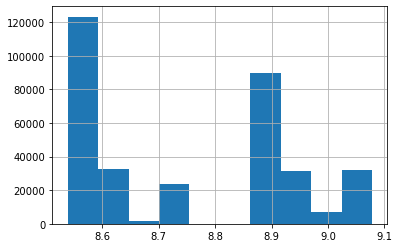

In [ ]:
dat = testing_df
# make predictions

pred = XXX  # predict out of sample

#show hist
pred.hist()

## <span style="color:purple"> Q7 Calculate how accurate your predictions for individual firms are.  Plot the results.</span>

RMS = 0.386; MAD= 0.033; pseudo-R2 = 0.179
              actual      predicted
count  340785.000000  340785.000000
mean        8.785754       8.751353
std         0.423911       0.184603
min         0.000000       8.538620
25%         8.523175       8.553319
50%         8.788746       8.709928
75%         9.055439       8.906712
max        10.634701       9.078020


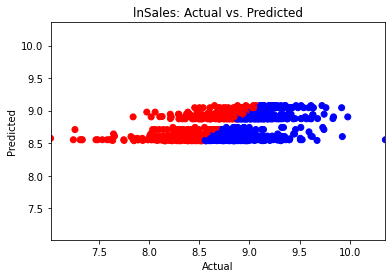

In [ ]:
import matplotlib.pyplot as plt

act       = testing_df['lnSales']
errors    = pred - act
err       = np.array(errors)

err2      = np.mean(err**2)
MAD       = XXX
RMS       = XXX
r         = XXX
pseudo_R2 = XXX

print('RMS = %.3f; MAD= %.3f; pseudo-R2 = %.3f' % (RMS,MAD,pseudo_R2))

## Plotting code
pred_df = pd.DataFrame({"actual":act, "predicted":pred})
plt_df  = pred_df.sample(n=1000, replace=False, random_state=123).sort_index()
plt_min = np.min(np.min(plt_df))
plt_max = np.max(np.max(plt_df))
plt_col = np.where(plt_df['actual']<plt_df['predicted'],"red","blue")

fig, ax = plt.subplots()
ax.scatter(plt_df['actual'], y=plt_df['predicted'],c=plt_col)
ax.set_xlim(plt_min,plt_max)
ax.set_ylim(plt_min,plt_max)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("lnSales: Actual vs. Predicted")
fig

print(pred_df.describe())


## <span style="color:purple"> Q8: Discuss your results. Does the model perform well? </span>

XXX

`________________________________________________________________________`

## <span style="color:purple"> Q9: Fit a logit model to the data to estimate the probability that `Sales` will be 'low' for for a given day  based on knowlege of observable day of the week and holiday features </span>

In [ ]:
#Fill in the formula for statmodel below 
f = 'lnSales ~ XXX'

### Fit the model
model_logit = smf.logit(XXX,data = XXX).fit90

print(model_logit.summary())

mfx = model_logit.get_margeff()
print(mfx.summary())





Optimization terminated successfully.
         Current function value: 0.366844
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           lowSalesFlag   No. Observations:               503607
Model:                          Logit   Df Residuals:                   503595
Method:                           MLE   Df Model:                           11
Date:                Sun, 26 Dec 2021   Pseudo R-squ.:                  0.1072
Time:                        10:21:48   Log-Likelihood:            -1.8475e+05
converged:                       True   LL-Null:                   -2.0692e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5897      0.013   -122.632      0.000      -1.615      -1.564
Promo            

## <span style="color:purple"> Q10:  Based on your results answer the following questions:</span> 

### <span style="color:purple">  For which day, on average, are sales most likely to be low? </span> 

XXX

### <span style="color:purple"> By how much does running a promotion reduce the probability of a low-sales day? </span>

XXX

### <span style="color:purple">  During which type of `StateHoliday` is the probablity of low sales the highest? </span>

XXX

## <span style="color:purple"> Q11: Now predict sales for the individual stores in data in`test_df` </span>

count    340785.000000
mean          0.136881
std           0.099540
min           0.024884
25%           0.042088
50%           0.152607
75%           0.231013
max           0.409377
dtype: float64


<AxesSubplot:>

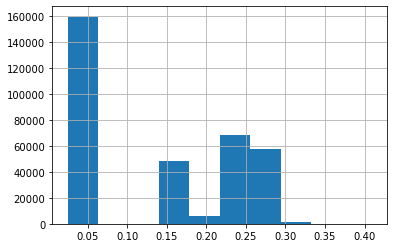

In [ ]:
dat = testing_df

# make predictions

pred = model_logit.predict(XXX)    # predict out of sample
print(pred.describe())
pred.hist()

## <span style="color:purple"> Q12 Calculate how accurate your predictions for individual firms are.  Plot the results. </span>

In [ ]:
# Shown two ways.  Only one is required


# Helper function

def cm2accuracy(tab):                    # convert 2x2 confusion matrix to accuracy (pct correct)
    correct  = (tab[0][0] + tab[1][1])
    total    = sum(sum(tab))
    accuracy = correct/total
    return(accuracy)

p_baseline           = np.mean(working_df['lowSalesFlag'])

# Calculate accuracy of statsmodels logit model using statsmodels pred.table (confusion matrix)

## Use the threshold above
logit_pred_tab       = model_logit.pred_table(XXX)
model_logit_accuracy = cm2accuracy(logit_pred_tab)

print("Confusion Matrix: Low Sales = 1)")

print(pd.DataFrame(np.round(logit_pred_tab,0)))
print()
      
print("Accuracy (statsmodels): ",np.round(model_logit_accuracy,2))
print()

print(pred_df.describe())
print()

# ------------------------------------------------------------------


Confusion Matrix: Low Sales = 1)
          0         1
0  209250.0  222199.0
1    8052.0   64106.0

Accuracy (statsmodels):  0.54

              actual      predicted
count  340785.000000  340785.000000
mean        0.114486       0.136881
std         0.318401       0.099540
min         0.000000       0.024884
25%         0.000000       0.042088
50%         0.000000       0.152607
75%         0.000000       0.231013
max         1.000000       0.409377

Accuracy (sklearn):  0.56



## <span style="color:purple">  Q13: Discuss your logit model results </span>

XXX

XXX

## <span style="color:purple">  Q14 Discuss what your next steps would be  to: </span>

### <span style="color:purple"> Improve your models' predictions </span>

XXX

### <span style="color:purple"> Convert your OLS results to estimates of total sales for the firm </span>

XXX

###  <span style="color:purple"> Begin to prepare for predicting low sales for each store relative to **its own** historical mean</span>

XXX